In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import display, HTML

In [0]:
#Librerias para usar Google Drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [115]:
#Leer_Datos
data_cov = pd.read_csv('/content/drive/My Drive/2020-1/Data TIA/covid-19-peru-data-1-mayo.csv',sep=',' ,header=0)

data_cov_v = data_cov.values

#print(data_cov['date'][2:10])
#print(data_cov.loc[data_cov['region'].isnull()])

data_peru = data_cov.loc[data_cov['region'].isnull()]

data_aqp = data_cov.loc[data_cov['region'] == 'Arequipa']

print(data_cov_v.shape)

(1059, 11)


In [116]:
import datetime as dt

#print(data_peru['date'][2:10])

print(type(data_peru['date'][1]))

data_peru['date'] = pd.to_datetime(data_peru['date'])

data_peru['date']=data_peru['date'].map(dt.datetime.toordinal)


#print(data_peru['date'][2:10])

data_aqp['date'] = pd.to_datetime(data_aqp['date'])

data_aqp['date']=data_aqp['date'].map(dt.datetime.toordinal)





<class 'str'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

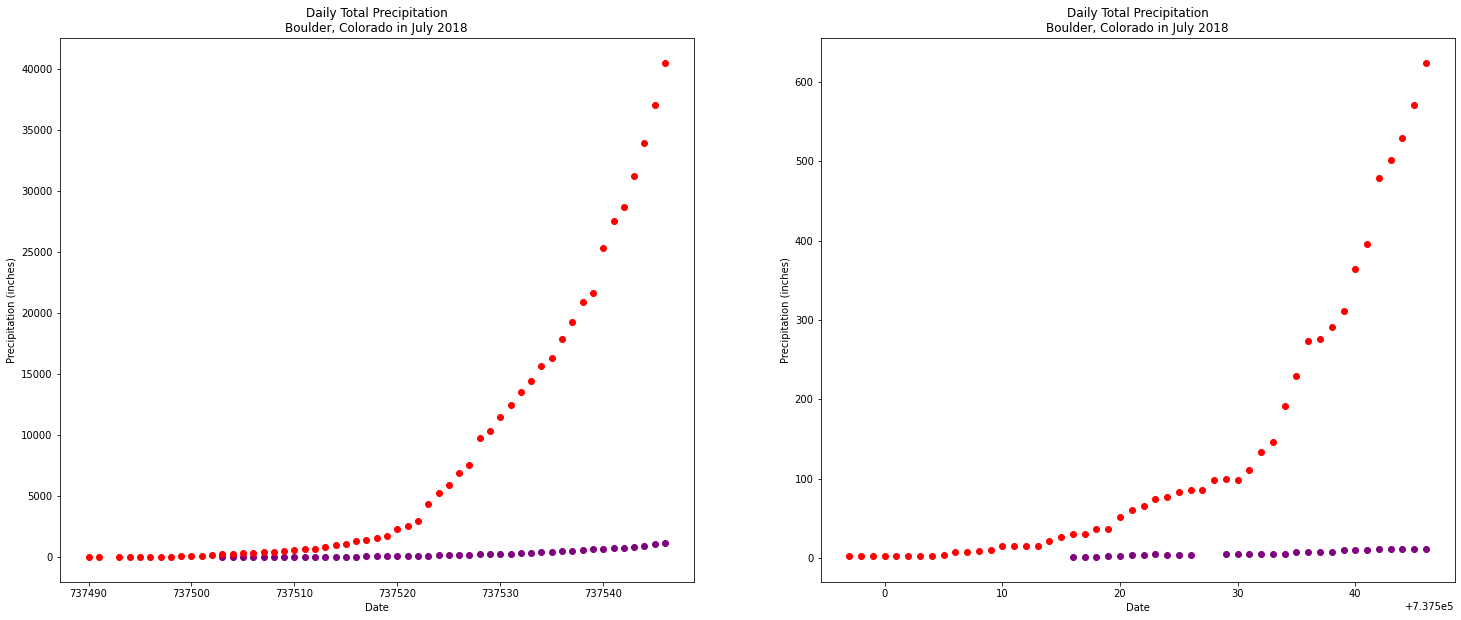

In [117]:
# Create figure and plot space
fig, ax = plt.subplots(1,2,figsize=(25, 10))

# Add x-axis and y-axis
ax[0].plot(data_peru['date'],
        data_peru['deaths'],'ro',
        color='purple')

ax[0].plot(data_peru['date'],
        data_peru['confirmed'],'ro',
        color='red')

# Set title and labels for axes
ax[0].set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Add x-axis and y-axis
ax[1].plot(data_aqp['date'],
        data_aqp['deaths'],'ro',
        color='purple')

ax[1].plot(data_aqp['date'],
        data_aqp['confirmed'],'ro',
        color='red')

# Set title and labels for axes
ax[1].set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()



In [118]:
def Normalizar_Datos( data ):
  #last = np.array(data[:,-1])
  #print(last)
  mean = np.mean(data,0)
  #print(mean)
  stdd = np.std(data,0)
  for i in range(0,data.shape[0]):
    data[i] = np.true_divide((data[i] - mean), stdd)
  #data[:,-1] = last[:]
  return data

#print(data_aqp.values)
#print(data_peru[2:8,:5])



data_aqp["deaths"].fillna(0, inplace = True) 
data_peru["deaths"].fillna(0, inplace = True) 

val_peru_p = data_peru.values[:,3:5]
val_aqp_p =  data_aqp.values[:,3:5]

val_peru_d = data_peru.values[:,3:6:2]
val_aqp_d =  data_aqp.values[:,3:6:2]

def trat_data(d):
  d = np.array(d, dtype=np.float64)
  d = Normalizar_Datos(d)
  np.random.shuffle(d)
  return d

#print(val_peru_p)
#print(val_aqp_p)


n_peru_p = trat_data(val_peru_p)
n_aqp_p = trat_data(val_aqp_p)
n_peru_d = trat_data(val_peru_d)
n_aqp_d = trat_data(val_aqp_d)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [119]:
def Crear_Entrenamiento_Prueba(x_data):
  train , test = np.split(x_data,[int(0.85*len(x_data))])
  return train,test

tr_peru_p , te_peru_p = Crear_Entrenamiento_Prueba(n_peru_p)
tr_aqp_p , te_aqp_p = Crear_Entrenamiento_Prueba(n_aqp_p)
tr_peru_d , te_peru_d = Crear_Entrenamiento_Prueba(n_peru_d)
tr_aqp_d , te_aqp_d = Crear_Entrenamiento_Prueba(n_aqp_d)

print(tr_peru_p.shape)
print(te_peru_p.shape)

def addf1(x_data):
  return np.insert(x_data, 0, 1, axis=1)

def gen_Tr_Te(tr_s, te_s,):
  te_y = te_s[:,-1:]
  te_x = te_s[:,0:-1]
  tr_y = tr_s[:,-1:]
  tr_x = tr_s[:,0:-1]
  
  tr_x = addf1(tr_x)
  te_x = addf1(te_x)
  
  return tr_x, tr_y, te_x, te_y

def theta(n):
  return np.zeros(n)[np.newaxis]



tr_x_pp, tr_y_pp, te_x_pp , te_y_pp = gen_Tr_Te(tr_peru_p , te_peru_p)
tr_x_ap, tr_y_ap, te_x_ap , te_y_ap = gen_Tr_Te(tr_aqp_p , te_aqp_p)
tr_x_pd, tr_y_pd, te_x_pd , te_y_pd = gen_Tr_Te(tr_peru_d , te_peru_d)
tr_x_ad, tr_y_ad, te_x_ad , te_y_ad = gen_Tr_Te(tr_aqp_d , te_aqp_d)

print(tr_x_pp.shape)
print(te_x_pp.shape)

theta_pp = theta(tr_x_pp.shape[1])
theta_ap = theta(tr_x_ap.shape[1])
theta_pd = theta(tr_x_pd.shape[1])
theta_ad = theta(tr_x_ad.shape[1])

(47, 2)
(9, 2)
(47, 2)
(9, 2)


In [0]:
#Calcular Costo
def Costo(x , y, theta):
  m = x.shape[0]
  cost = np.sum((x.dot(theta.T) - y)**2) / (2 * m)
  return cost

#Gradiente Descendiente 
def Gradiente(x,y, theta, it, alpha):
  costos = np.empty(it)
  m = x.shape[0]
  for i in range(it):
    h = x.dot(theta.T)
    dif = h-y
    der = (x.T).dot(dif)/ m
    theta = theta - (alpha * der).T
    costos[i] = Costo(x,y,theta)
  return theta, costos

def MSE(Y_r, Y):
    m = len(Y)
    return np.sum((Y_r - Y)**2) / m



[Text(0, 0.5, 'Positivos'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Covid Peru Positivos')]

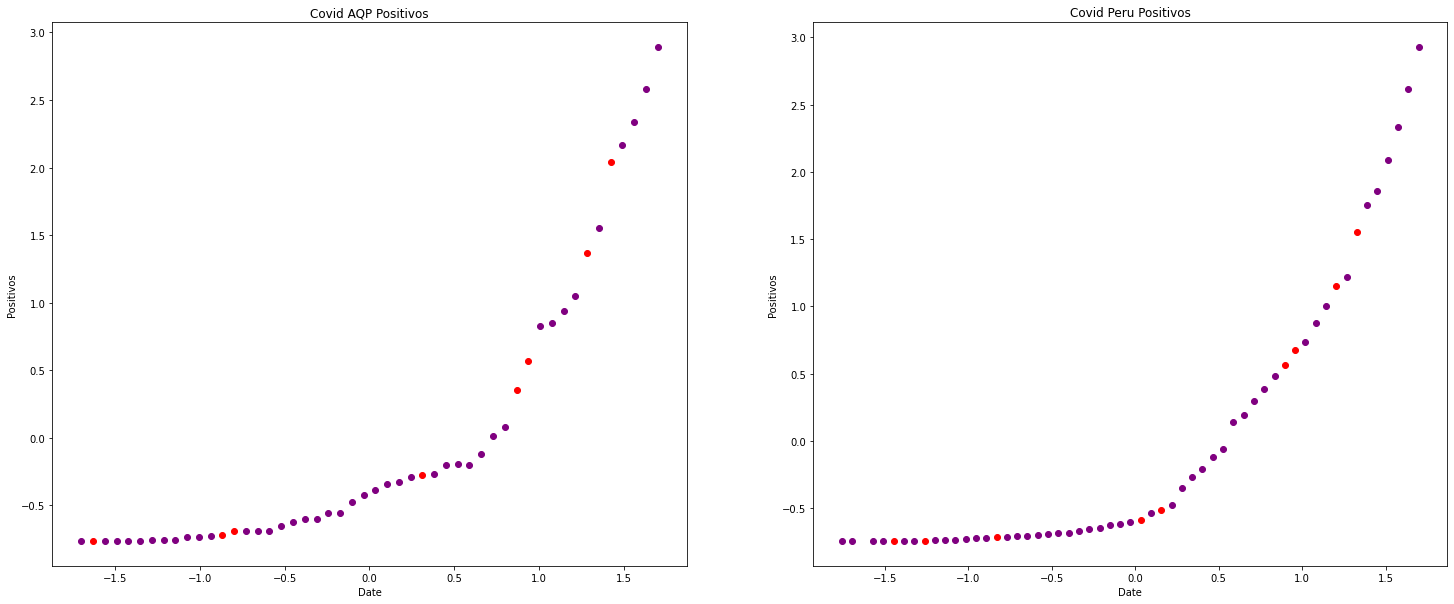

In [121]:
fig1, ax1 = plt.subplots(1,2,figsize=(25, 10))
# Add x-axis and y-axis
ax1[0].plot(tr_x_ap[:,1],
        tr_y_ap,'ro',
        color='purple')

ax1[0].plot(te_x_ap[:,1],
        te_y_ap,'ro',
        color='red')

# Set title and labels for axes
ax1[0].set(xlabel="Date",
       ylabel="Positivos",
       title="Covid AQP Positivos")

ax1[1].plot(tr_x_pp[:,1],
        tr_y_pp,'ro',
        color='purple')

ax1[1].plot(te_x_pp[:,1],
        te_y_pp,'ro',
        color='red')

# Set title and labels for axes
ax1[1].set(xlabel="Date",
       ylabel="Positivos",
       title="Covid Peru Positivos")

In [122]:
alpha= 0.02
it = 1000

tmp_theta , _ = Gradiente(tr_x_ap, tr_y_ap, theta_ap , it ,alpha)

rpta_l = MSE(te_x_ap.dot(tmp_theta.T), te_y_ap)

print(tmp_theta)

tmp_theta2 , _ = Gradiente(tr_x_pp, tr_y_pp, theta_pp , it ,alpha)

rpta_l2 = MSE(te_x_pp.dot(tmp_theta.T), te_y_pp)

print(tmp_theta2)

tmp_theta3 , _ = Gradiente(tr_x_ad, tr_y_ad, theta_ad , it ,alpha)

rpta_l3 = MSE(te_x_ad.dot(tmp_theta.T), te_y_ad)

print(tmp_theta3)

tmp_theta4 , _ = Gradiente(tr_x_pd, tr_y_pd, theta_pd , it ,alpha)

rpta_l4 = MSE(te_x_pd.dot(tmp_theta.T), te_y_pd)

print(tmp_theta4)

print([rpta_l,rpta_l2,rpta_l3,rpta_l4])

[[-0.01353355  0.86137162]]
[[0.00562348 0.88378815]]
[[0.0100219  0.91829826]]
[[0.00671088 0.80150935]]
[0.20834865656006232, 0.1569410092806055, 0.3531270959259748, 0.4253611333773498]


Text(0, 0.5, 'Muertes')

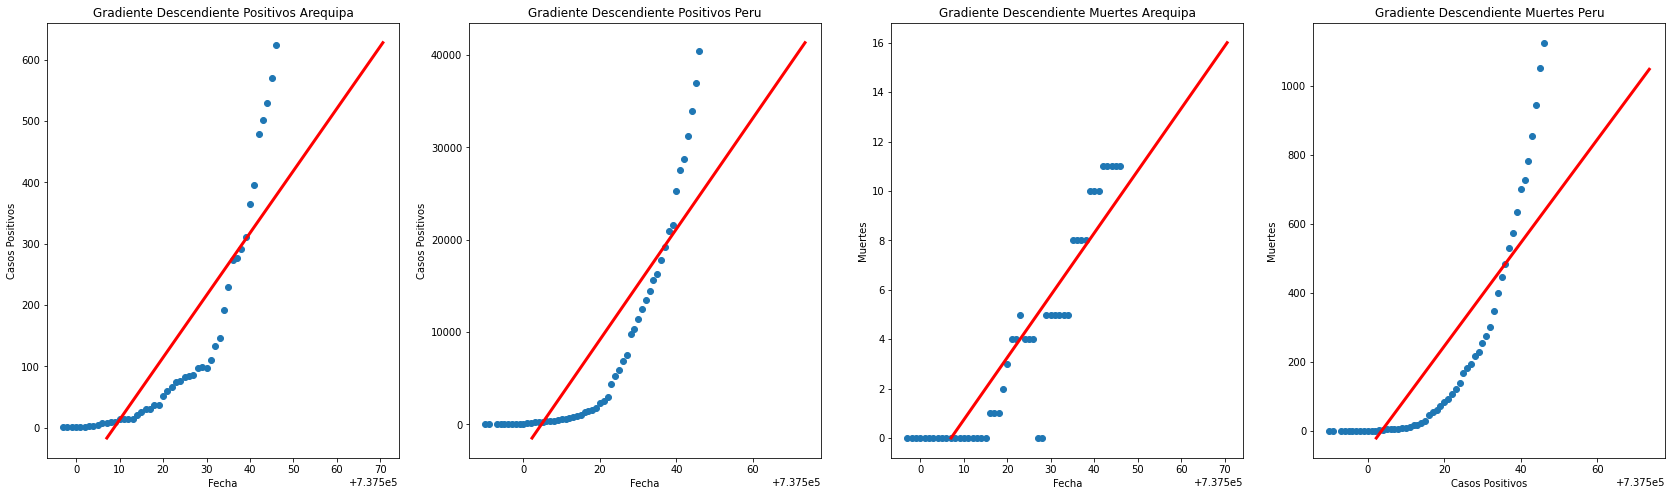

In [123]:
def No_Normalizar(data,t):
  mean = np.mean(data,0)
  stdd = np.std(data,0)

  return (t*stdd)+mean


fig, ax = plt.subplots(1,4,figsize=(29,8))

points =  np.array(val_aqp_p)
points2 =  np.array(val_peru_p)
points3 =  np.array(val_aqp_d)
points4=  np.array(val_peru_d)

x_Home =np.array(val_aqp_p[:,0], dtype=np.float64)
y_Home =np.array(val_aqp_p[:,1], dtype=np.float64)

x_Home2 =np.array(val_peru_p[:,0], dtype=np.float64)
y_Home2 =np.array(val_peru_p[:,1], dtype=np.float64)

x_Home3 =np.array(val_aqp_d[:,0], dtype=np.float64)
y_Home3 =np.array(val_aqp_d[:,1], dtype=np.float64)

x_Home4 =np.array(val_peru_d[:,0], dtype=np.float64)
y_Home4 =np.array(val_peru_d[:,1], dtype=np.float64)

tmp = No_Normalizar(x_Home,tmp_theta)
tmp2 = No_Normalizar(x_Home2,tmp_theta2)
tmp3 = No_Normalizar(x_Home3,tmp_theta3)
tmp4 = No_Normalizar(x_Home4,tmp_theta4)

rect_U = np.arange(-1,3.5,0.1)[np.newaxis].T
rect_U = np.insert(rect_U, 0, 1, axis=1)

yg = rect_U.dot(tmp_theta.T)
y2 = rect_U.dot(tmp_theta2.T)
y3 = rect_U.dot(tmp_theta3.T)
y4 = rect_U.dot(tmp_theta4.T)

rect_p = No_Normalizar(x_Home,rect_U)
rect_p2 = No_Normalizar(x_Home2,rect_U)
rect_p3 = No_Normalizar(x_Home3,rect_U)
rect_p4 = No_Normalizar(x_Home4,rect_U)

yg = No_Normalizar(y_Home,yg)
y2 = No_Normalizar(y_Home2,y2)
y3 = No_Normalizar(y_Home3,y3)
y4 = No_Normalizar(y_Home4,y4)

ax[0].scatter(points[:,0],points[:,1])
ax[0].plot(rect_p[:,1],yg,'-r',linewidth=3.0)
ax[0].set_title("Gradiente Descendiente Positivos Arequipa")
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Casos Positivos")


ax[1].scatter(points2[:,0],points2[:,1])
ax[1].plot(rect_p2[:,1],y2,'-r',linewidth=3.0)
ax[1].set_title("Gradiente Descendiente Positivos Peru")
ax[1].set_xlabel("Fecha")
ax[1].set_ylabel("Casos Positivos")

ax[2].scatter(points3[:,0],points3[:,1])
ax[2].plot(rect_p3[:,1],y3,'-r',linewidth=3.0)
ax[2].set_title("Gradiente Descendiente Muertes Arequipa")
ax[2].set_xlabel("Fecha")
ax[2].set_ylabel("Muertes")


ax[3].scatter(points4[:,0],points4[:,1])
ax[3].plot(rect_p4[:,1],y4,'-r',linewidth=3.0)
ax[3].set_title("Gradiente Descendiente Muertes Peru")
ax[3].set_xlabel("Casos Positivos")
ax[3].set_ylabel("Muertes")

In [124]:
from scipy import optimize

def Normalizar_MinMax( data ):
  mean = np.mean(data,0)

  min = np.amin(data, axis=0) 
  max = np.amax(data, axis=0) 

  for i in range(0,data.shape[0]):
    data[i] = np.true_divide((data[i] - min), (max-min))
  return data


def No_NormalizarMinMax(data,t):

  mean = np.mean(data,0)
  min = np.amin(data, axis=0) 
  max = np.amax(data, axis=0)

  return (t*(max-min))+min

def trat_data2(d):
  d = np.array(d, dtype=np.float64)
  d = Normalizar_MinMax(d)
  np.random.shuffle(d)
  return d


n_peru_p2 = trat_data2(val_peru_p)
n_aqp_p2 = trat_data2(val_aqp_p)
n_peru_d2 = trat_data2(val_peru_d)
n_aqp_d2 = trat_data2(val_aqp_d)

tr_peru_p2 , te_peru_p2 = Crear_Entrenamiento_Prueba(n_peru_p2)
tr_aqp_p2 , te_aqp_p2 = Crear_Entrenamiento_Prueba(n_aqp_p2)
tr_peru_d2 , te_peru_d2 = Crear_Entrenamiento_Prueba(n_peru_d2)
tr_aqp_d2 , te_aqp_d2 = Crear_Entrenamiento_Prueba(n_aqp_d2)

tr_x_pp2, tr_y_pp2, te_x_pp2 , te_y_pp2 = gen_Tr_Te(tr_peru_p2 , te_peru_p2)
tr_x_ap2, tr_y_ap2, te_x_ap2 , te_y_ap2 = gen_Tr_Te(tr_aqp_p2 , te_aqp_p2)
tr_x_pd2, tr_y_pd2, te_x_pd2 , te_y_pd2 = gen_Tr_Te(tr_peru_d2 , te_peru_d2)
tr_x_ad2, tr_y_ad2, te_x_ad2 , te_y_ad2 = gen_Tr_Te(tr_aqp_d2 , te_aqp_d2)

#print(tr_x_pp2)

pp = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_peru_p2[:,0], tr_peru_p2[:,1] )
pd = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_peru_d2[:,0], tr_peru_d2[:,1] )
ap = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_aqp_p2[:,0], tr_aqp_p2[:,1] )
ad = optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  tr_aqp_d2[:,0], tr_aqp_d2[:,1] )

print(pp[0])
print(pd[0])
print(ap[0])
print(ad[0])


#print(tr_peru_p[:,0])

def func_exp(a,b,x):
  a = np.array(a, dtype=np.float64)
  b = np.array(b, dtype=np.float64)
  return a*np.exp(b*x)

[0.00640681 5.08058175]
[0.00527634 5.27218495]
[0.00717866 4.97164448]
[0.04056777 3.38449035]


[0.00717866]
[737497 737498 737499 737500 737501 737502 737503 737504 737505 737506
 737507 737508 737509 737510 737511 737512 737513 737514 737515 737516
 737517 737518 737519 737520 737521 737522 737523 737524 737525 737526
 737527 737528 737529 737530 737531 737532 737533 737534 737535 737536
 737537 737538 737539 737540 737541 737542 737543 737544 737545 737546]
[0.11451198154974804, 0.10053316864991897, 0.07829342445393601, 0.12411857225110566]


Text(0, 0.5, 'Muertes')

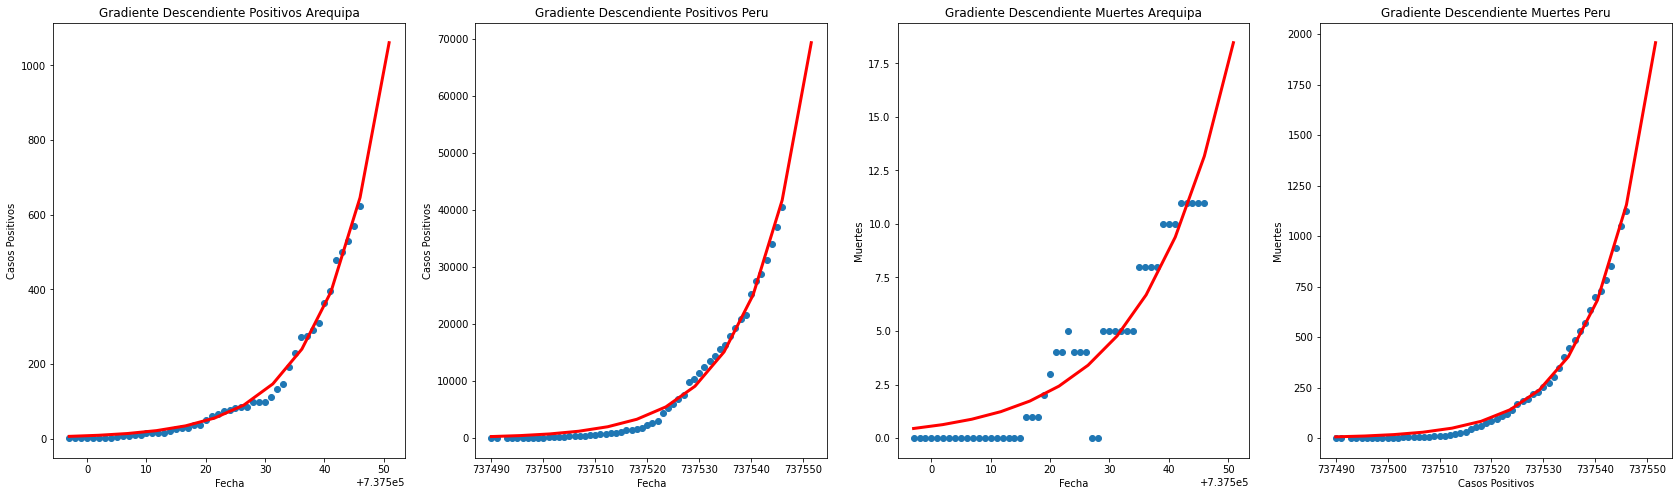

In [141]:


points =  np.array(val_aqp_p)
points2 =  np.array(val_peru_p)
points3 =  np.array(val_aqp_d)
points4=  np.array(val_peru_d)
'''
rpta_e1 = MSE(func_exp(pp[0][0],pp[0][1],te_x_pp2)[:,1], te_y_pp2)
rpta_e2 = MSE(func_exp(ap[0][0],ap[0][1],te_x_ap2)[:,1], te_y_ap2)
rpta_e3 = MSE(func_exp(pd[0][0],pd[0][1],te_x_pd2)[:,1], te_y_pd2)
rpta_e4 = MSE(func_exp(ad[0][0],ad[0][1],te_x_ad2)[:,1], te_y_ad2)

print([rpta_e2,rpta_e1,rpta_e4,rpta_e3])

print(te_y_pp2)
print(func_exp(pp[0][0],pp[0][1],te_x_pp2))

'''

fig2, ax2 = plt.subplots(1,4,figsize=(29,8))




rect_U = np.arange(0,1.2,0.1)[np.newaxis].T
#rect_U = np.insert(rect_U, 0, 1, axis=1)

#print(rect_U)

yg = func_exp(ap[0][0],ap[0][1],rect_U)
y2 = func_exp(pp[0][0],pp[0][1],rect_U)
y3 = func_exp(ad[0][0],ad[0][1],rect_U)
y4 = func_exp(pd[0][0],pd[0][1],rect_U)

print(yg[0])


rect_p = No_NormalizarMinMax(x_Home,rect_U)
rect_p2 = No_NormalizarMinMax(x_Home2,rect_U)
rect_p3 = No_NormalizarMinMax(x_Home3,rect_U)
rect_p4 = No_NormalizarMinMax(x_Home4,rect_U)

yg = No_NormalizarMinMax(y_Home,yg)
y2 = No_NormalizarMinMax(y_Home2,y2)
y3 = No_NormalizarMinMax(y_Home3,y3)
y4 = No_NormalizarMinMax(y_Home4,y4)

print(points[:,0])

rpta_e1 = MSE(func_exp(pp[0][0],pp[0][1],tr_x_ap2), tr_x_ap2)
rpta_e2 = MSE(func_exp(ap[0][0],ap[0][1],tr_x_pp2), tr_x_pp2)
rpta_e3 = MSE(func_exp(pd[0][0],pd[0][1],tr_x_ad2), tr_x_ad2)
rpta_e4 = MSE(func_exp(ad[0][0],ad[0][1],tr_x_pd2), tr_x_pd2)

print([rpta_e2,rpta_e1,rpta_e4,rpta_e3])


ax2[0].scatter(points[:,0],points[:,1])
ax2[0].plot(rect_p,yg,'-r',linewidth=3.0)
ax2[0].set_title("Gradiente Descendiente Positivos Arequipa")
ax2[0].set_xlabel("Fecha")
ax2[0].set_ylabel("Casos Positivos")


ax2[1].scatter(points2[:,0],points2[:,1])
ax2[1].plot(rect_p2,y2,'-r',linewidth=3.0)
ax2[1].set_title("Gradiente Descendiente Positivos Peru")
ax2[1].set_xlabel("Fecha")
ax2[1].set_ylabel("Casos Positivos")

ax2[2].scatter(points3[:,0],points3[:,1])
ax2[2].plot(rect_p3,y3,'-r',linewidth=3.0)
ax2[2].set_title("Gradiente Descendiente Muertes Arequipa")
ax2[2].set_xlabel("Fecha")
ax2[2].set_ylabel("Muertes")


ax2[3].scatter(points4[:,0],points4[:,1])
ax2[3].plot(rect_p4,y4,'-r',linewidth=3.0)
ax2[3].set_title("Gradiente Descendiente Muertes Peru")
ax2[3].set_xlabel("Casos Positivos")
ax2[3].set_ylabel("Muertes")


[0.0065288  5.06129897]
[4.81947082e-03 5.38592423e+00]
[0.00644393 5.09011711]
[0.04479895 3.27244856]


Text(0, 0.5, 'Muertes')

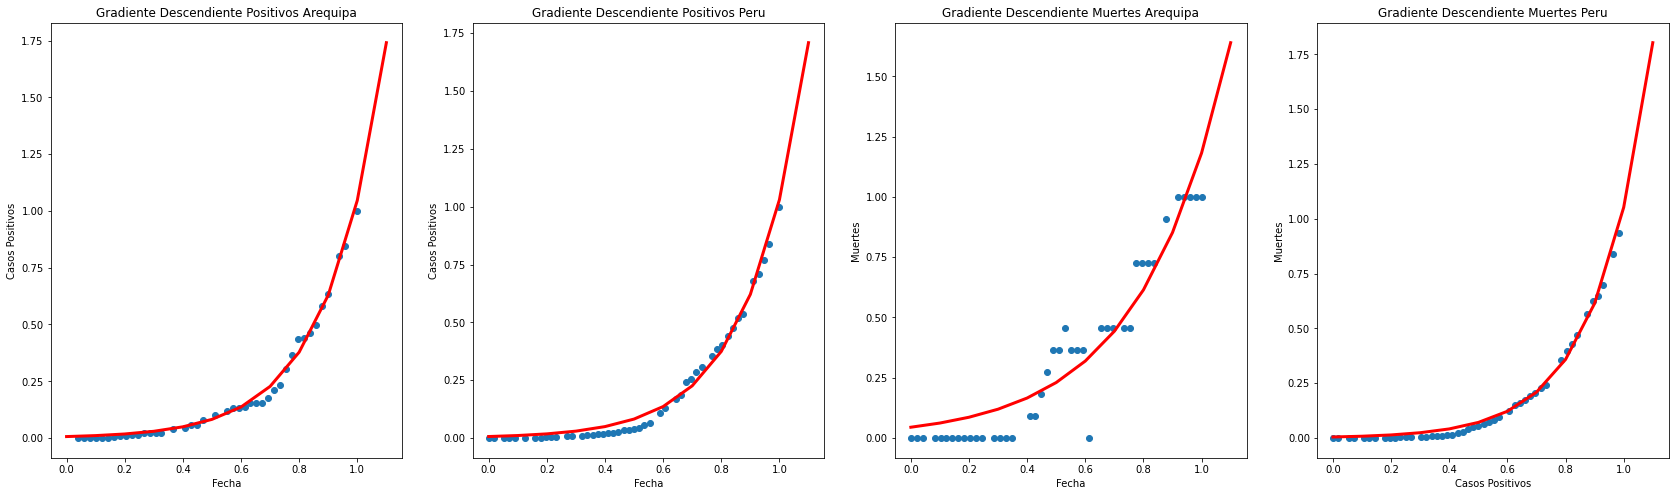

In [81]:



print(pp[0])
print(pd[0])
print(ap[0])
print(ad[0])

fig3, ax3 = plt.subplots(1,4,figsize=(29,8))

rect_U = np.arange(0,1.15,0.1)[np.newaxis].T
#rect_U = np.insert(rect_U, 0, 1, axis=1)

#print(rect_U)

yg = func_exp(ap[0][0],ap[0][1],rect_U)
y2 = func_exp(pp[0][0],pp[0][1],rect_U)
y3 = func_exp(ad[0][0],ad[0][1],rect_U)
y4 = func_exp(pd[0][0],pd[0][1],rect_U)

#print(tr_aqp_d)


ax3[0].scatter(tr_aqp_p2[:,0],tr_aqp_p2[:,1])
ax3[0].plot(rect_U,yg,'-r',linewidth=3.0)
ax3[0].set_title("Gradiente Descendiente Positivos Arequipa")
ax3[0].set_xlabel("Fecha")
ax3[0].set_ylabel("Casos Positivos")


ax3[1].scatter(tr_peru_p2[:,0],tr_peru_p2[:,1])
ax3[1].plot(rect_U,y2,'-r',linewidth=3.0)
ax3[1].set_title("Gradiente Descendiente Positivos Peru")
ax3[1].set_xlabel("Fecha")
ax3[1].set_ylabel("Casos Positivos")

ax3[2].scatter(tr_aqp_d2[:,0],tr_aqp_d2[:,1])
ax3[2].plot(rect_U,y3,'-r',linewidth=3.0)
ax3[2].set_title("Gradiente Descendiente Muertes Arequipa")
ax3[2].set_xlabel("Fecha")
ax3[2].set_ylabel("Muertes")


ax3[3].scatter(tr_peru_d2[:,0],tr_peru_d2[:,1])
ax3[3].plot(rect_U,y4,'-r',linewidth=3.0)
ax3[3].set_title("Gradiente Descendiente Muertes Peru")
ax3[3].set_xlabel("Casos Positivos")
ax3[3].set_ylabel("Muertes")


In [159]:
fechas_futuras = np.arange(1.5,3,0.01785714)
#print(fechas_futuras)
#16 de mayo al 14 junio 2020 mediante la predicción exponencial son:
prediccion = func_exp(ap[0][0],ap[0][1],fechas_futuras)
#print(prediccion)
print(No_NormalizarMinMax(y_Home,prediccion))


[7.73896448e+03 8.45726037e+03 9.24224248e+03 1.01001019e+04
 1.10376046e+04 1.20621446e+04 1.31818024e+04 1.44054086e+04
 1.57426138e+04 1.72039644e+04 1.88009861e+04 2.05462745e+04
 2.24535946e+04 2.45379894e+04 2.68158983e+04 2.93052871e+04
 3.20257895e+04 3.49988620e+04 3.82479530e+04 4.17986880e+04
 4.56790715e+04 4.99197078e+04 5.45540426e+04 5.96186268e+04
 6.51534044e+04 7.12020279e+04 7.78122027e+04 8.50360627e+04
 9.29305822e+04 1.01558025e+05 1.10986435e+05 1.21290174e+05
 1.32550507e+05 1.44856244e+05 1.58304439e+05 1.73001158e+05
 1.89062312e+05 2.06614576e+05 2.25796384e+05 2.46759021e+05
 2.69667818e+05 2.94703457e+05 3.22063392e+05 3.51963409e+05
 3.84639329e+05 4.20348865e+05 4.59373656e+05 5.02021489e+05
 5.48628726e+05 5.99562955e+05 6.55225892e+05 7.16056548e+05
 7.82534691e+05 8.55184632e+05 9.34579357e+05 1.02134505e+06
 1.11616602e+06 1.21979013e+06 1.33303464e+06 1.45679272e+06
 1.59204044e+06 1.73984449e+06 1.90137059e+06 2.07789269e+06
 2.27080301e+06 2.481623